<a href="https://colab.research.google.com/github/englishmuffins10/Homework/blob/main/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Problem 9.4 Page 424

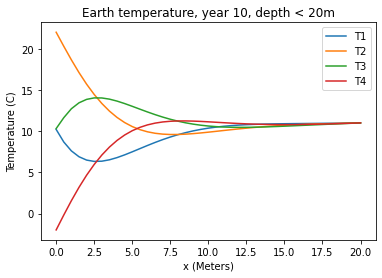

In [37]:
import numpy as np
from matplotlib import pyplot as plt

# Function that takes t (days) and returns the value for the surface temperature
def getTSurface(t):
  A = 10
  B = 12
  Tao = 365
  val = (2*np.pi*t)/Tao
  return A + (B*np.sin(val))

# Function that goes through a set period of time, simulating changing temps
# Takes T(Starting Temps), Tp(Temp after h), TBottom(Temp at N=L), 
#   f(funcion that returns surface temp), t(time increment, days), 
#   tend(final day), c, h, and N
# Returns the final Temperature Array and the final day
def Simulate(T, Tp, TBottom, f, t, tend, c, h, N):
  while t < tend:
    Tp[0] = f(t+h)

    Tp[1:N] = T[1:N] + c*(T[2:N+1]+T[0:N-1]-2*T[1:N])

    T,Tp = Tp,T
    t += h

  return T,t

# Constants
L = 20                # Depth
D = .1                # Thermal diffusivity
N = 40                # Number of divisions in grid
a = L/N               # Grid spacing
h = 1                 # Time-step (days)
c = h*D/(a*a)

TBottom = 11          # Temperaure at lowest depth
TStart = 10           # Starting temperatures

# Create arrays
T = np.empty(N+1,float)
T[0] = getTSurface(1)
T[N] = TBottom
T[1:N] = TStart
Tp = np.empty(N+1,float)
Tp[N] = TBottom
xArr = np.linspace(0,L,N+1)


# Simulate first 9 years
t = 1
tend = 365*9
T,t = Simulate(T, Tp, TBottom, getTSurface, t, tend, c, h, N)


# First day, T1
tend = tend+1
T,t = Simulate(T, Tp, TBottom, getTSurface, t, tend, c, h, N)
plt.plot(xArr,T, Label = "T1")

# 3 months later, T2
tend = tend+(30*3)
T,t = Simulate(T, Tp, TBottom, getTSurface, t, tend, c, h, N)
plt.plot(xArr,T, Label = "T2")

# 3 months later, T3
tend = tend+(30*3)
T,t = Simulate(T, Tp, TBottom, getTSurface, t, tend, c, h, N)
plt.plot(xArr,T, Label = "T3")

# 3 months later, T4
tend = tend+(30*3)
T,t = Simulate(T, Tp, TBottom, getTSurface, t, tend, c, h, N)
plt.plot(xArr,T, Label = "T4")

# Graph Results:
plt.legend()
plt.title("Earth temperature, year 10, depth < 20m")
plt.xlabel("x (Meters)")
plt.ylabel("Temperature (C)")
plt.show()

2) Problem 9.5 Page 431